In [64]:
import pandas as pd
train = pd.read_csv('heart.csv')
train 
y = train['HeartDisease']
train = train.drop(columns='HeartDisease')

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          918 non-null    int64  
 1   FastingBS    918 non-null    int64  
 2   Cholesterol  918 non-null    int64  
 3   Oldpeak      918 non-null    float64
 4   RestingBP    918 non-null    int64  
 5   MaxHR        918 non-null    int64  
 6   N            918 non-null    uint8  
 7   Y            918 non-null    uint8  
 8   Down         918 non-null    uint8  
 9   Flat         918 non-null    uint8  
 10  Up           918 non-null    uint8  
 11  F            918 non-null    uint8  
 12  M            918 non-null    uint8  
 13  ASY          918 non-null    uint8  
 14  ATA          918 non-null    uint8  
 15  NAP          918 non-null    uint8  
 16  TA           918 non-null    uint8  
 17  LVH          918 non-null    uint8  
 18  Normal       918 non-null    uint8  
 19  ST      

In [65]:
set1 = set(train.columns)
set2 = set(train.describe().columns)
diff = set1.difference(set2)
dummies = pd.DataFrame(pd.get_dummies(train[diff.pop()]))
while diff :
    dummies = dummies.join(pd.get_dummies(train[diff.pop()]))
dummies

,N,Y,Down,Flat,Up,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST
0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
1,1,0,0,1,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,1,0,1,0,1,0,0,0,0,1
3,0,1,0,1,0,1,0,1,0,0,0,0,1,0
4,1,0,0,0,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,0,0,1,0,0,1,0,0,0,1,0,1,0
914,1,0,0,1,0,0,1,1,0,0,0,0,1,0
915,0,1,0,1,0,0,1,1,0,0,0,0,1,0
916,1,0,0,1,0,1,0,0,1,0,0,1,0,0


In [66]:
train = train[set2].join(dummies)
train

,Age,FastingBS,Cholesterol,Oldpeak,RestingBP,MaxHR,N,Y,Down,Flat,Up,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST
0,40,0,289,0.0,140,172,1,0,0,0,1,0,1,0,1,0,0,0,1,0
1,49,0,180,1.0,160,156,1,0,0,1,0,1,0,0,0,1,0,0,1,0
2,37,0,283,0.0,130,98,1,0,0,0,1,0,1,0,1,0,0,0,0,1
3,48,0,214,1.5,138,108,0,1,0,1,0,1,0,1,0,0,0,0,1,0
4,54,0,195,0.0,150,122,1,0,0,0,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,264,1.2,110,132,1,0,0,1,0,0,1,0,0,0,1,0,1,0
914,68,1,193,3.4,144,141,1,0,0,1,0,0,1,1,0,0,0,0,1,0
915,57,0,131,1.2,130,115,0,1,0,1,0,0,1,1,0,0,0,0,1,0
916,57,0,236,0.0,130,174,1,0,0,1,0,1,0,0,1,0,0,1,0,0


In [70]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train,y)
x_test.shape

(230, 20)

In [89]:
from sklearn import neural_network
nn = neural_network.MLPClassifier(hidden_layer_sizes=(512,1024,2048,4096))
nn.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(512, 1024, 2048, 4096))

In [90]:
nn.score(x_test,y_test)

0.8304347826086956

In [91]:
test_mse = np.square(nn.predict(x_test)-y_test).mean()
print('test_mse = %f'%test_mse)
train_mse = np.square(nn.predict(x_train)-y_train).mean()
print('train_mse = %f'%train_mse)

test_mse = 0.169565
train_mse = 0.138081


In [112]:
from sklearn import linear_model
log_regr = linear_model.LogisticRegression(max_iter=10000)
log_regr.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [115]:
log_regr.score(x_test,y_test)

0.8608695652173913

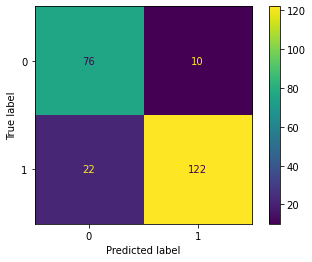

In [113]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
%matplotlib inline
mat = confusion_matrix(log_regr.predict(x_test),y_test)
dis = ConfusionMatrixDisplay(mat)
dis.plot()

miss_rate = 15.384615%


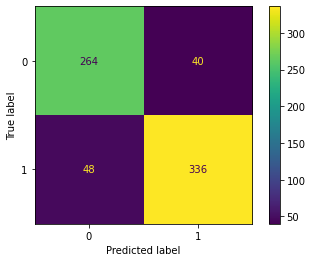

In [126]:
mat = confusion_matrix(log_regr.predict(x_train),y_train)
dis = ConfusionMatrixDisplay(mat)
dis.plot()
print('miss_rate = %f' %(48/(48+264)*100)+'%')